<a href="https://colab.research.google.com/github/Nihavk28/cnn-image-classification/blob/main/Malaria_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MALARIA CLASSIFICATION**



>    Malaria is a life threatening disease spread to humans through infected female Anopheles mosquitoes. According to the World Malaria report,the death rate for the disease is increasing,early diagnosis and treatment is important to reduce the disease and thereby prevent the death.



> The aim of this project is to build a CNN model to classify the images of the cells into Malaria infected cells and non-infected cells.





       





**1.Importing Necessary Modules**

In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

**2.Data Loading**

In [ ]:

X=[]
y=[]
datadir='/content/drive/MyDrive/malaria_dataset'
categories=['parasitized', 'Uninfected']
for category in categories:
  print("Loading:",category)
  path=os.path.join(datadir,category)
  # print(path)
  images=os.listdir(path)
  # print(images)
  for img in images:
    imgpath=os.path.join(path,img)
    # print(imgpath)
    img_array=imread(imgpath)
    # print(img_array)
    img_resized=resize(img_array,(150,150,3))
    X.append(img_resized)
    y.append(categories.index(category))
  print("Loaded:",category)


Loading: parasitized
Loaded: parasitized
Loading: Uninfected
Loaded: Uninfected


In [ ]:
img_array.shape

(112, 106, 3)

In [ ]:
img_resized.shape

(150, 150, 3)

**3.Convert Data Into Numpy Array**

In [ ]:
X=np.array(X)
X

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [ ]:
y=np.array(y)
y

array([0, 0, 0, ..., 1, 1, 1])

**4.Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,X_test.shape

((3500, 150, 150, 3), (1500, 150, 150, 3))

In [ ]:
y_train.shape,y_test.shape

((3500,), (1500,))

**5.Model creation**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=(150,150,3), activation="relu"))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(40, activation="relu"))
model.add(Dense(2, activation='softmax'))

**6.Compile The Model**

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**7.Fit And Evaluate Model**

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=20)

Epoch 1/20
175/175 [==============================] - 87s 489ms/step - loss: 0.6831 - accuracy: 0.5660
Epoch 2/20
175/175 [==============================] - 87s 495ms/step - loss: 0.6494 - accuracy: 0.6143
Epoch 3/20
175/175 [==============================] - 84s 478ms/step - loss: 0.6041 - accuracy: 0.6751
Epoch 4/20
175/175 [==============================] - 86s 491ms/step - loss: 0.5509 - accuracy: 0.7289
Epoch 5/20
175/175 [==============================] - 86s 494ms/step - loss: 0.4278 - accuracy: 0.8023
Epoch 6/20
175/175 [==============================] - 85s 486ms/step - loss: 0.1647 - accuracy: 0.9386
Epoch 7/20
175/175 [==============================] - 85s 487ms/step - loss: 0.1070 - accuracy: 0.9689
Epoch 8/20
175/175 [==============================] - 87s 495ms/step - loss: 0.0456 - accuracy: 0.9849
Epoch 9/20
175/175 [==============================] - 85s 486ms/step - loss: 0.0298 - accuracy: 0.9883
Epoch 10/20
175/175 [==============================] - 87s 495ms/step - l

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print('LOSS:',loss)
print('ACCURACY:',accuracy)

47/47 [==============================] - 14s 292ms/step - loss: 0.5886 - accuracy: 0.9213
LOSS: 0.588649332523346
ACCURACY: 0.9213333129882812


**8.Prediction**

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
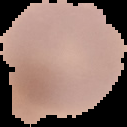

In [ ]:
img=imread('/content/drive/MyDrive/malaria_dataset/parasitized/C39P4thinF_original_IMG_20150622_111942_cell_10.png')
img

In [ ]:
img=resize(img,(150,150,3))
img.shape

(150, 150, 3)

In [ ]:
img=img.reshape(1,150,150,3)
img.shape

(1, 150, 150, 3)

In [ ]:
prediction=model.predict(img)
prediction


1/1 [==============================] - 0s 126ms/step


array([[9.9994624e-01, 5.3803709e-05]], dtype=float32)

In [ ]:
ind=prediction.argmax(axis=1)
ind

array([0])

In [ ]:
categories[ind.item()]

'parasitized'

**9.Save The Model**

In [ ]:
model.save('cnnmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
